In [108]:
# Just to know last time this was run:
import time
print time.ctime()

Wed Sep 28 15:41:21 2016


# G The astropy package

The Astropy Project is a community effort to develop a single core package for Astronomy in Python and foster interoperability between Python astronomy packages. More informations here: http://www.astropy.org/

!!! WARNING !!!

To install atpy, one must use the --no-deps option when using pip (otherwise updates of numpy may be performed):

*pip install -U --no-deps astropy*

In [109]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Constants and Units

In [110]:
from astropy import constants as const
from astropy import units as u
help(const)

Help on package astropy.constants in astropy:

NAME
    astropy.constants

FILE
    /Users/christophemorisset/anaconda/lib/python2.7/site-packages/astropy/constants/__init__.py

DESCRIPTION
    Contains astronomical and physical constants for use in Astropy or other
    places.
    
    A typical use case might be::
    
        >>> from astropy.constants import c, m_e
        >>> # ... define the mass of something you want the rest energy of as m ...
        >>> m = m_e
        >>> E = m * c**2
        >>> E.to('MeV')  # doctest: +FLOAT_CMP
        <Quantity 0.510998927603161 MeV>
    
    The following constants are available:
    
    ========== ============== ================ =========================
       Name        Value            Unit       Description
    ========== ============== ================ =========================
        G       6.67384e-11     m3 / (kg s2)   Gravitational constant
      L_bol0     3.0128e+28          W         Luminosity for absolute bolometric m

In [111]:
# Pretty printing
print const.c

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2010


In [112]:
# .to change the unit
print const.c.to('pc/yr')

0.306601393788 pc / yr


In [113]:
# basic operations are managed
const.c * 2

<Quantity 599584916.0 m / s>

In [114]:
np.sqrt(const.c)

<Quantity 17314.51581766005 m(1/2) / s(1/2)>

In [115]:
print np.sqrt(const.c)

17314.5158177 m(1/2) / s(1/2)


In [116]:
# Following the units
F = (const.G * 3. * const.M_sun * 100 * u.kg) / (2.2 * u.au) ** 2
print F

8.22826558512e+21 kg m3 / (AU2 s2)


In [117]:
F

<Quantity 8.228265585123966e+21 kg m3 / (AU2 s2)>

In [118]:
# Convert in more classical unit
print F.to(u.N)

0.367669392028 N


In [119]:
q = 42.0 * u.meter

In [120]:
q**2

<Quantity 1764.0 m2>

In [121]:
# Extract only the value
(q**2).value

1764.0

In [122]:
# Resolving redondant units
t = 3.0 * u.kilometer / (130.51 * u.meter / u.second)
print t
print t.decompose()

0.0229867443108 km s / m
22.9867443108 s


In [123]:
x = 1.0 * u.parsec
print x.to(u.km)

3.08567758147e+13 km


In [124]:
lam = 5007 * u.angstrom

In [125]:
print lam.to(u.nm)
print lam.to(u.micron)

500.7 nm
0.5007 micron


In [126]:
# Some transformations needs extra information, available from u.special
print lam.to(u.eV, equivalencies=u.spectral())

2.47621715438 eV


More in http://docs.astropy.org/en/stable/units/index.html

### Data Table

http://docs.astropy.org/en/stable/table/index.html

In [127]:
from astropy.table import Table

In [128]:
# create a table with non homogeneous types
a = [1, 4, 5]
b = [2.0, 5.0, 8.2]
c = ['x', 'y', 'z']
t = Table([a, b, c], names=('a', 'b', 'c'), meta={'name': 'first table'})
print t

 a   b   c 
--- --- ---
  1 2.0   x
  4 5.0   y
  5 8.2   z


In [129]:
# Pretty output
t

a,b,c
int64,float64,str1
1,2.0,x
4,5.0,y
5,8.2,z


In [130]:
# One can change the output format
t['b'].format = '7.3f'
t['a'].format = '{:.4f}'
# and add units
t['b'].unit = 's'
t

a,b,c
,s,
int64,float64,str1
1.0000,2.000,x
4.0000,5.000,y
5.0000,8.200,z


In [131]:
t.show_in_browser(jsviewer=True)

In [132]:
# access the column names
t.colnames

['a', 'b', 'c']

In [133]:
# length of the table (number of rows)
len(t)

3

In [134]:
# Acces one element
t['a'][1]

4

In [135]:
# Modify one element
t['a'][1] = 10
t

a,b,c
,s,
int64,float64,str1
1.0000,2.000,x
10.0000,5.000,y
5.0000,8.200,z


In [136]:
# easy add column:
t['d'] = [1, 2, 3]

In [137]:
t

a,b,c,d
,s,,
int64,float64,str1,int64
1.0000,2.000,x,1
10.0000,5.000,y,2
5.0000,8.200,z,3


In [138]:
t.rename_column('a', 'A')
t

A,b,c,d
,s,,
int64,float64,str1,int64
1.0000,2.000,x,1
10.0000,5.000,y,2
5.0000,8.200,z,3


In [139]:
t.add_row([-8, -9, 'r', 10])
t

A,b,c,d
,s,,
int64,float64,str1,int64
1.0000,2.000,x,1
10.0000,5.000,y,2
5.0000,8.200,z,3
-8.0000,-9.000,r,10


In [140]:
t.add_row([-9, 40, 'q', 10])
t

A,b,c,d
,s,,
int64,float64,str1,int64
1.0000,2.000,x,1
10.0000,5.000,y,2
5.0000,8.200,z,3
-8.0000,-9.000,r,10
-9.0000,40.000,q,10


In [141]:
# Masked values
t = Table([a, b, c], names=('a', 'b', 'c'), masked=True)
t['a'].mask = [True, True, False] # True is for the masked values!!
t

a,b,c
int64,float64,str1
--,2.0,x
--,5.0,y
5,8.2,z


In [142]:
# Creat a table from a table
t2 = Table([t['a']**2, t['b']**2])
t2

a,b
int64,float64
--,4.0
--,25.0
25,67.24


In [143]:
# Managing columns
from astropy.table import Column

In [144]:
# Create a table combining different formats
a = (1, 4)
b = np.array([[2, 3], [5, 6]])  # vector column
c = Column(['x', 'y'], name='axis')
arr = (a, b, c)
t3 = Table(arr)  # Data column named "c" has a name "axis" in that table
t3

col0,col1 [2],axis
int64,int64,str1
1,2 .. 3,x
4,5 .. 6,y


In [145]:
# table from a dictionnary
rr = {'a': [1, 4],
      'b': [2.0, 5.0],
      'c': ['x', 'y']}
t4 = Table(rr, names=('a', 'c', 'b'))
t4

a,c,b
int64,str1,float64
1,x,2.0
4,y,5.0


In [146]:
# Create table row by row
t5 = Table(rows=[{'a': 5, 'b': 10}, {'a': 15, 'b': 30}])
t5

a,b
int64,int64
5,10
15,30


In [147]:
# Numpy structured array
arr = np.array([(1, 2.0, 'x'),
                (4, 5.0, 'y')],
               dtype=[('a', 'i8'), ('b', 'f8'), ('c', 'S2')])
t6 = Table(arr)
t6

a,b,c
int64,float64,str2
1,2.0,x
4,5.0,y


Python arrays versus `numpy` arrays as input

There is a slightly subtle issue that is important to understand in the way that Table objects are created. Any data input that looks like a Python list (including a tuple) is considered to be a list of columns. In contrast an homogeneous numpy array input is interpreted as a list of rows:

In [148]:
arr = np.array([(1, 2.0, 'x'),
                (4, 5.0, 'y')],
               dtype=[('a', 'i8'), ('b', 'f8'), ('c', 'S2')])
t6 = Table(arr, copy=False) # pointing to the original data
arr['a'][0] = 99
print arr
print t6

[(99, 2.0, 'x') (4, 5.0, 'y')]
 a   b   c 
--- --- ---
 99 2.0   x
  4 5.0   y


In [149]:
t6.columns

TableColumns([('a', <Column name='a' dtype='int64' length=2>
               99
                4), ('b', <Column name='b' dtype='float64' length=2>
               2.0
               5.0), ('c', <Column name='c' dtype='str2' length=2>
               x
               y)])

In [150]:
t6.colnames

['a', 'b', 'c']

In [151]:
# One can obtain a numpy structured array from a Table
np.array(t6)

array([(99, 2.0, 'x'), (4, 5.0, 'y')], 
      dtype=[('a', '<i8'), ('b', '<f8'), ('c', 'S2')])

In [152]:
arr = np.arange(3000).reshape(100, 30)  # 100 rows x 30 columns array
t = Table(arr)
print t

col0 col1 col2 col3 col4 col5 col6 ... col23 col24 col25 col26 col27 col28 col29
---- ---- ---- ---- ---- ---- ---- ... ----- ----- ----- ----- ----- ----- -----
   0    1    2    3    4    5    6 ...    23    24    25    26    27    28    29
  30   31   32   33   34   35   36 ...    53    54    55    56    57    58    59
  60   61   62   63   64   65   66 ...    83    84    85    86    87    88    89
  90   91   92   93   94   95   96 ...   113   114   115   116   117   118   119
 120  121  122  123  124  125  126 ...   143   144   145   146   147   148   149
 150  151  152  153  154  155  156 ...   173   174   175   176   177   178   179
 180  181  182  183  184  185  186 ...   203   204   205   206   207   208   209
 210  211  212  213  214  215  216 ...   233   234   235   236   237   238   239
 240  241  242  243  244  245  246 ...   263   264   265   266   267   268   269
 270  271  272  273  274  275  276 ...   293   294   295   296   297   298   299
 ...  ...  ...  ...  ...  ..

In [153]:
t.show_in_browser(jsviewer=True)

In [154]:
# create a simple table to play with
arr = np.arange(15).reshape(5, 3)
t = Table(arr, names=('a', 'b', 'c'), meta={'keywords': {'key1': 'val1'}})
t

a,b,c
int64,int64,int64
0,1,2
3,4,5
6,7,8
9,10,11
12,13,14


In [155]:
t['a'] = [1, -2, 3, -4, 5]  # Set all
t

a,b,c
int64,int64,int64
1,1,2
-2,4,5
3,7,8
-4,10,11
5,13,14


In [156]:
t['a'][2] = 30 # set one
t

a,b,c
int64,int64,int64
1,1,2
-2,4,5
30,7,8
-4,10,11
5,13,14


In [157]:
# set one row
t[1] = (8, 9, 10)
t

a,b,c
int64,int64,int64
1,1,2
8,9,10
30,7,8
-4,10,11
5,13,14


In [158]:
# Set a whole column
t['a'] = 99
t

a,b,c
int64,int64,int64
99,1,2
99,9,10
99,7,8
99,10,11
99,13,14


In [159]:
# Add a column
t.add_column(Column(np.array([1,2,3,4,5]), name='d'))
t

a,b,c,d
int64,int64,int64,int64
99,1,2,1
99,9,10,2
99,7,8,3
99,10,11,4
99,13,14,5


In [160]:
# remove a column
t.remove_column('b')
t

a,c,d
int64,int64,int64
99,2,1
99,10,2
99,8,3
99,11,4
99,14,5


In [161]:
# add a row
t.add_row([-8, -9, 10])
t

a,c,d
int64,int64,int64
99,2,1
99,10,2
99,8,3
99,11,4
99,14,5
-8,-9,10


In [162]:
# Remove some rows
t.remove_rows([1, 2])
t

a,c,d
int64,int64,int64
99,2,1
99,11,4
99,14,5
-8,-9,10


In [163]:
# sort the Table using one column
t.sort('c')
t

a,c,d
int64,int64,int64
-8,-9,10
99,2,1
99,11,4
99,14,5


In [164]:
mask = (t['a'] > 50) & (t['d'] > 3)
print mask

[False False  True  True]


In [165]:
t[mask]

a,c,d
int64,int64,int64
99,11,4
99,14,5


In [166]:
%%writefile tab1.dat
#name    obs_date    mag_b  mag_v
M31     2012-01-02  17.0   17.5
M31     2012-01-02  17.1   17.4
M101    2012-01-02  15.1   13.5
M82     2012-02-14  16.2   14.5
M31     2012-02-14  16.9   17.3
M82     2012-02-14  15.2   15.5
M101    2012-02-14  15.0   13.6
M82     2012-03-26  15.7   16.5
M101    2012-03-26  15.1   13.5
M101    2012-03-26  14.8   14.3

Overwriting tab1.dat


In [167]:
# directly read a Table from an ascii file
obs = Table.read('tab1.dat', format='ascii')

In [168]:
print obs

name  obs_date  mag_b mag_v
---- ---------- ----- -----
 M31 2012-01-02  17.0  17.5
 M31 2012-01-02  17.1  17.4
M101 2012-01-02  15.1  13.5
 M82 2012-02-14  16.2  14.5
 M31 2012-02-14  16.9  17.3
 M82 2012-02-14  15.2  15.5
M101 2012-02-14  15.0  13.6
 M82 2012-03-26  15.7  16.5
M101 2012-03-26  15.1  13.5
M101 2012-03-26  14.8  14.3


In [169]:
# Group data
obs_by_name = obs.group_by('name')
obs_by_name

name,obs_date,mag_b,mag_v
str4,str10,float64,float64
M101,2012-01-02,15.1,13.5
M101,2012-02-14,15.0,13.6
M101,2012-03-26,15.1,13.5
M101,2012-03-26,14.8,14.3
M31,2012-01-02,17.0,17.5
M31,2012-01-02,17.1,17.4
M31,2012-02-14,16.9,17.3
M82,2012-02-14,16.2,14.5
M82,2012-02-14,15.2,15.5


In [170]:
print obs_by_name.groups.keys

name
----
M101
 M31
 M82


In [171]:
# Using 2 keys to group
print obs.group_by(['name', 'obs_date']).groups.keys

name  obs_date 
---- ----------
M101 2012-01-02
M101 2012-02-14
M101 2012-03-26
 M31 2012-01-02
 M31 2012-02-14
 M82 2012-02-14
 M82 2012-03-26


In [172]:
# Extracting a group
print obs_by_name.groups[1]

name  obs_date  mag_b mag_v
---- ---------- ----- -----
 M31 2012-01-02  17.0  17.5
 M31 2012-01-02  17.1  17.4
 M31 2012-02-14  16.9  17.3


In [173]:
# Using a mask to select entries
mask = obs_by_name.groups.keys['name'] == 'M101'
print mask
print obs_by_name.groups[mask]

[ True False False]
name  obs_date  mag_b mag_v
---- ---------- ----- -----
M101 2012-01-02  15.1  13.5
M101 2012-02-14  15.0  13.6
M101 2012-03-26  15.1  13.5
M101 2012-03-26  14.8  14.3


In [174]:
# Some functions can be applied to the elements of a group
obs_mean = obs_by_name.groups.aggregate(np.mean) 
print obs_mean

name mag_b mag_v 
---- ----- ------
M101  15.0 13.725
 M31  17.0   17.4
 M82  15.7   15.5


In [175]:
print obs_by_name['name', 'mag_v', 'mag_b'].groups.aggregate(np.mean)

name mag_v  mag_b
---- ------ -----
M101 13.725  15.0
 M31   17.4  17.0
 M82   15.5  15.7


In [176]:
# creat a new Table on the fly
obs1 = Table.read("""name    obs_date    mag_b  logLx
M31     2012-01-02  17.0   42.5
M82     2012-10-29  16.2   43.5
M101    2012-10-31  15.1   44.5""", format='ascii')

In [177]:
# this is used to stack Tables
from astropy.table import vstack

In [179]:
tvs = vstack([obs, obs1])
tvs

name,obs_date,mag_b,mag_v,logLx
str4,str10,float64,float64,float64
M31,2012-01-02,17.0,17.5,--
M31,2012-01-02,17.1,17.4,--
M101,2012-01-02,15.1,13.5,--
M82,2012-02-14,16.2,14.5,--
M31,2012-02-14,16.9,17.3,--
M82,2012-02-14,15.2,15.5,--
M101,2012-02-14,15.0,13.6,--
M82,2012-03-26,15.7,16.5,--
M101,2012-03-26,15.1,13.5,--


In [188]:
d = Table.read('data4.dat', format='ascii.fixed_width', 
               col_starts=(0, 5, 10,12, 20, 29, 38), 
               names=('id', 'wl', 'wlu', 'I', 'wl2', 'err', 'obs'))
d

id,wl,wlu,I,wl2,err,obs
str4,float64,str1,float64,float64,float64,str15
H 1,6563.0,A,2.8667,6563.0,0.19467,Anabel
H 1,4340.0,A,0.4933,4340.0,0.03307,Anabel
H 1,4102.0,A,0.2907,4102.0,0.02229,Anabel
H 1,3970.0,A,0.18,3970.0,0.01253,Anabel
N 2,6584.0,A,2.1681,6584.0,0.08686,Anabel
N 2,121.7,m,0.004462,1217000.0,0.2,Liu
O 1,6300.0,A,0.0147,6300.0,0.00325,Anabel
TOTL,2326.0,A,0.079,2326.0,0.2,Adams
C 2,157.6,m,0.00856,1576000.0,0.2,Liu


In [189]:
d.group_by('obs')

id,wl,wlu,I,wl2,err,obs
str4,float64,str1,float64,float64,float64,str15
TOTL,2326.0,A,0.079,2326.0,0.2,Adams
H 1,6563.0,A,2.8667,6563.0,0.19467,Anabel
H 1,4340.0,A,0.4933,4340.0,0.03307,Anabel
H 1,4102.0,A,0.2907,4102.0,0.02229,Anabel
H 1,3970.0,A,0.18,3970.0,0.01253,Anabel
N 2,6584.0,A,2.1681,6584.0,0.08686,Anabel
O 1,6300.0,A,0.0147,6300.0,0.00325,Anabel
N 2,121.7,m,0.004462,1217000.0,0.2,Liu
C 2,157.6,m,0.00856,1576000.0,0.2,Liu


There is a lot of possibilities of joining Tables, see http://docs.astropy.org/en/stable/table/operations.html

In [85]:
t = Table.read("ftp://cdsarc.u-strasbg.fr/pub/cats/J/other/RMxAA/45.261/digeda.dat", 
               format='ascii.cds', 
               readme='ftp://cdsarc.u-strasbg.fr/pub/cats/J/other/RMxAA/45.261/ReadMe')

In [86]:
t

ObsID,Pos,I3727,I4363,IHb,I4959,I5007,I5876,I6300,I6548,IHa,I6583,I6716,I6731,I16+31,Te,R16/31,R07/59,RHa/Hb,EM(Ha),RefID,MType,Slit,Region,GalID,RefN
,pc,,,,,,,,,,,,,,10000 K,,,,pc / cm6,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64
1,0.03,--,--,1.0,0.2,0.6,--,--,--,2.86,1.0,--,--,--,--,--,--,--,--,1,12,3,1,2,1
2,0.03,--,--,1.0,0.33,0.96,--,--,--,2.86,1.32,--,--,--,--,--,--,--,--,1,12,3,1,2,1
3,0.05,--,--,1.0,0.32,0.95,--,--,--,2.86,1.11,--,--,--,--,--,--,--,--,1,12,3,1,2,1
4,0.06,--,--,1.0,0.12,0.36,--,--,--,2.86,1.06,--,--,--,--,--,--,--,--,1,12,3,1,2,1
5,0.07,--,--,1.0,0.27,0.8,--,--,--,2.86,1.08,--,--,--,--,--,--,--,--,1,12,3,1,2,1
6,0.12,--,--,1.0,0.31,0.9,--,--,--,2.86,1.06,--,--,--,--,--,--,--,--,1,12,3,1,2,1
7,0.13,--,--,1.0,0.29,0.85,--,--,--,2.86,1.42,--,--,--,--,--,--,--,--,1,12,3,1,2,1
8,0.15,--,--,1.0,0.3,0.89,--,--,--,2.86,0.94,--,--,--,--,--,--,--,--,1,12,3,1,2,1


In [87]:
t.show_in_browser(jsviewer=True)

/Users/christophemorisset/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


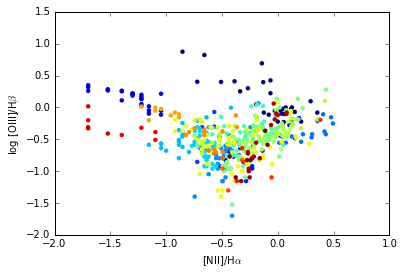

In [88]:
plt.scatter(np.log10(t['I6583']), np.log10(t['I5007']), c=t['RefN'], edgecolor='None')
plt.xlabel(r'[NII]/H$\alpha$')
plt.ylabel(r'log [OIII]/H$\beta$')

In [89]:
t = Table.read("ftp://cdsarc.u-strasbg.fr/pub/cats/VII/253/snrs.dat",
readme="ftp://cdsarc.u-strasbg.fr/pub/cats/VII/253/ReadMe",
format="ascii.cds")

In [90]:
t

SNR,RAh,RAm,RAs,DE-,DEd,DEm,MajDiam,---,MinDiam,u_MinDiam,type,l_S(1GHz),S(1GHz),u_S(1GHz),Sp-Index,u_Sp-Index,Names
,h,min,s,,deg,arcmin,arcmin,,arcmin,,,,Jy,,,,
str11,int64,int64,int64,str1,int64,int64,float64,str1,float64,str1,str2,str1,float64,str1,float64,str1,str26
G000.0+00.0,17,45,44,-,29,0,3.5,x,2.5,--,S,--,100.0,?,0.8,?,Sgr A East
G000.3+00.0,17,46,15,-,28,38,15.0,x,8.0,--,S,--,22.0,--,0.6,--,--
G000.9+00.1,17,47,21,-,28,9,8.0,--,--,--,C,--,18.0,?,--,v,--
G001.0-00.1,17,48,30,-,28,9,8.0,--,--,--,S,--,15.0,--,0.6,?,--
G001.4-00.1,17,49,39,-,27,46,10.0,--,--,--,S,--,2.0,?,--,?,--
G001.9+00.3,17,48,45,-,27,10,1.5,--,--,--,S,--,0.6,--,0.6,--,--
G003.7-00.2,17,55,26,-,25,50,14.0,x,11.0,--,S,--,2.3,--,0.65,--,--
G003.8+00.3,17,52,55,-,25,28,18.0,--,--,--,S?,--,3.0,?,0.6,--,--


In [91]:
t.show_in_browser(jsviewer=True)

In [92]:
t[0:10].write('tab_cds1.tex', format='latex')

In [93]:
!cat tab_cds1.tex

\begin{table}
\begin{tabular}{cccccccccccccccccc}
SNR & RAh & RAm & RAs & DE- & DEd & DEm & MajDiam & --- & MinDiam & u_MinDiam & type & l_S(1GHz) & S(1GHz) & u_S(1GHz) & Sp-Index & u_Sp-Index & Names \\
 & $\mathrm{h}$ & $\mathrm{min}$ & $\mathrm{s}$ &  & $\mathrm{{}^{\circ}}$ & $\mathrm{{}^{\prime}}$ & $\mathrm{{}^{\prime}}$ &  & $\mathrm{{}^{\prime}}$ &  &  &  & $\mathrm{Jy}$ &  &  &  &  \\
G000.0+00.0 & 17 & 45 & 44 & - & 29 & 0 & 3.5 & x & 2.5 & -- & S & -- & 100.0 & ? & 0.8 & ? & Sgr A East \\
G000.3+00.0 & 17 & 46 & 15 & - & 28 & 38 & 15.0 & x & 8.0 & -- & S & -- & 22.0 & -- & 0.6 & -- & -- \\
G000.9+00.1 & 17 & 47 & 21 & - & 28 & 9 & 8.0 & -- & -- & -- & C & -- & 18.0 & ? & -- & v & -- \\
G001.0-00.1 & 17 & 48 & 30 & - & 28 & 9 & 8.0 & -- & -- & -- & S & -- & 15.0 & -- & 0.6 & ? & -- \\
G001.4-00.1 & 17 & 49 & 39 & - & 27 & 46 & 10.0 & -- & -- & -- & S & -- & 2.0 & ? & -- & ? & -- \\
G001.9+00.3 & 17 & 48 & 45 & - & 27 & 10 & 1.5 & -- & -- & -- & S & -- & 0.6 & -- & 0.6 & -- & 

In [95]:
t[10:20].write('tab_cds1.ascii', format='ascii', delimiter='|', formats={'Sp-Index': '%0.2f'})

In [96]:
!cat tab_cds1.ascii

SNR|RAh|RAm|RAs|DE-|DEd|DEm|MajDiam|---|MinDiam|u_MinDiam|type|l_S(1GHz)|S(1GHz)|u_S(1GHz)|Sp-Index|u_Sp-Index|Names
G004.8+06.2|17|33|25|-|21|34|18.0|--|--|--|S|--|3.0|--|0.60|--|--
G005.2-02.6|18|7|30|-|25|45|18.0|--|--|--|S|--|2.6|?|0.60|?|--
G005.4-01.2|18|2|10|-|24|54|35.0|--|--|--|C?|--|35.0|?|0.20|?|Milne 56
G005.5+00.3|17|57|4|-|24|0|15.0|x|12.0|--|S|--|5.5|--|0.70|--|--
G005.9+03.1|17|47|20|-|22|16|20.0|--|--|--|S|--|3.3|?|0.40|?|--
G006.1+00.5|17|57|29|-|23|25|18.0|x|12.0|--|S|--|4.5|--|0.90|--|--
G006.1+01.2|17|54|55|-|23|5|30.0|x|26.0|--|F|--|4.0|?|0.30|?|--
G006.4-00.1|18|0|30|-|23|26|48.0|--|--|--|C|--|310.0|--|--|v|W28
G006.4+04.0|17|45|10|-|21|22|31.0|--|--|--|S|--|1.3|?|0.40|?|--
G006.5-00.4|18|2|11|-|23|34|18.0|--|--|--|S|--|27.0|--|0.60|--|--


In [97]:
t[10:20].write('tab_cds2.ascii', format='ascii.fixed_width', delimiter='|', formats={'Sp-Index': '%0.2f'})

In [98]:
!cat tab_cds2.ascii

|         SNR | RAh | RAm | RAs | DE- | DEd | DEm | MajDiam | --- | MinDiam | u_MinDiam | type | l_S(1GHz) | S(1GHz) | u_S(1GHz) | Sp-Index | u_Sp-Index |    Names |
| G004.8+06.2 |  17 |  33 |  25 |   - |  21 |  34 |    18.0 |  -- |      -- |        -- |    S |        -- |     3.0 |        -- |     0.60 |         -- |       -- |
| G005.2-02.6 |  18 |   7 |  30 |   - |  25 |  45 |    18.0 |  -- |      -- |        -- |    S |        -- |     2.6 |         ? |     0.60 |          ? |       -- |
| G005.4-01.2 |  18 |   2 |  10 |   - |  24 |  54 |    35.0 |  -- |      -- |        -- |   C? |        -- |    35.0 |         ? |     0.20 |          ? | Milne 56 |
| G005.5+00.3 |  17 |  57 |   4 |   - |  24 |   0 |    15.0 |   x |    12.0 |        -- |    S |        -- |     5.5 |        -- |     0.70 |         -- |       -- |
| G005.9+03.1 |  17 |  47 |  20 |   - |  22 |  16 |    20.0 |  -- |      -- |        -- |    S |        -- |     3.3 |         ? |     0.40 |          ? |       -- |
| G0

The astropy Table can also read FITS files (if containing tables), VO tables and hdf5 format. See more there: http://docs.astropy.org/en/stable/io/unified.html

### Time and Dates

The astropy.time package provides functionality for manipulating times and dates. Specific emphasis is placed on supporting time scales (e.g. UTC, TAI, UT1, TDB) and time representations (e.g. JD, MJD, ISO 8601) that are used in astronomy and required to calculate, e.g., sidereal times and barycentric corrections. It uses Cython to wrap the C language ERFA time and calendar routines, using a fast and memory efficient vectorization scheme. More here: http://docs.astropy.org/en/stable/time/index.html

### Coordinates

The coordinates package provides classes for representing a variety of celestial/spatial coordinates, as well as tools for converting between common coordinate systems in a uniform way.

In [99]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [100]:
c = SkyCoord(ra=10.5*u.degree, dec=41.2*u.degree, frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.5, 41.2)>

In [103]:
c = SkyCoord('0 42 00 +41 12 00', frame='icrs', unit=(u.hourangle, u.deg))
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.5, 41.2)>

In [105]:
print c.ra, c.dec

10d30m00s 41d12m00s


In [106]:
c.to_string('decimal')

u'10.5 41.2'

In [107]:
print c.dec.to_string(format='latex')

$41^\circ12{}^\prime00{}^{\prime\prime}$


$$41^\circ12{}^\prime00{}^{\prime\prime}$$

### Modeling

astropy.modeling provides a framework for representing models and performing model evaluation and fitting. It currently supports 1-D and 2-D models and fitting with parameter constraints.

It is designed to be easily extensible and flexible. Models do not reference fitting algorithms explicitly and new fitting algorithms may be added without changing the existing models (though not all models can be used with all fitting algorithms due to constraints such as model linearity).

The goal is to eventually provide a rich toolset of models and fitters such that most users will not need to define new model classes, nor special purpose fitting routines (while making it reasonably easy to do when necessary).

### Convolution and filtering

astropy.convolution provides convolution functions and kernels that offers improvements compared to the scipy scipy.ndimage convolution routines, including:

* Proper treatment of NaN values
* A single function for 1-D, 2-D, and 3-D convolution
* Improved options for the treatment of edges
* Both direct and Fast Fourier Transform (FFT) versions
* Built-in kernels that are commonly used in Astronomy

More on http://docs.astropy.org/en/stable/convolution/index.html